In [ ]:
# Libraries for handling numeric computation and data frames
import pandas as PD
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = r'/content/drive/MyDrive/Fall 2024/CSML/Final Project/ai4i2020.csv'
# Read the CSV file
df = pd.read_csv(file_path)
df['Temp_Diff'] = abs(df['Air temperature [K]']  - df['Process temperature [K]'])
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Diff,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,56320.0


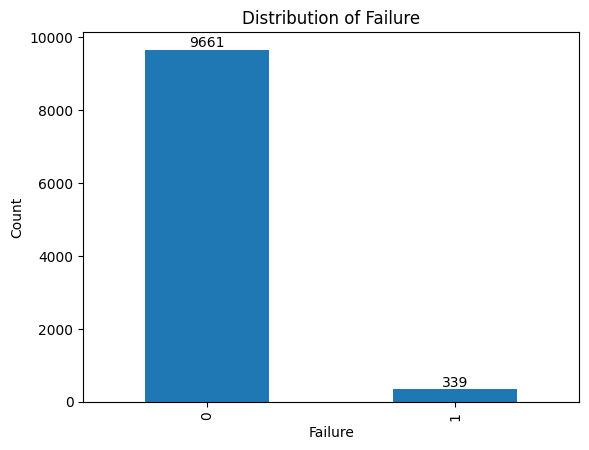

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts and plot the bar chart
ax = df['Machine failure'].value_counts().plot(kind='bar')

# Add data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Failure')
plt.ylabel('Count')
plt.title('Distribution of Failure')
plt.show()

Here is the Column defintion of all of it.

  
*  -UDI: Unique identifier for each data entry.
* -Product ID: Identifier for the specific product being measured.
-Type: Classification of the product, labeled as L, M, or H (likely -representing categories such as light, medium, or heavy machinery).
-Air temperature [K]: Temperature of the surrounding air in Kelvin.
-Process temperature [K]: Temperature of the process or machinery in Kelvin, -typically higher than air temperature.
-Rotational speed [rpm]: The speed at which the machine’s components are -rotating, measured in revolutions per minute.
-Torque [Nm]: Torque in Newton-meters, measuring the rotational force applied.
-Tool wear [min]: The wear of the machine’s tool, measured in minutes of usage.
-Machine failure: Binary indicator (1 or 0) of whether the machine experienced a failure.
-TWF (Tool Wear Failure): Binary indicator of failure due to tool wear.
-HDF (Heat Dissipation Failure): Binary indicator of failure due to insufficient heat dissipation.
-PWF (Power Failure): Binary indicator of failure due to power issues.
-OSF (Overstrain Failure): Binary indicator of failure due to overstrain.
-RNF (Random Failure): Binary indicator of a random failure not attributed to -any specific cause.


Since my last couple cols tell me how this failed, I need to be able to predict that as well. Which will be broken down into two parts. Frst part will be to predict only the Machine Failre itself. The second part will be to Taking that prediction data and predict the multi class label telling us how it failed in the first place.

Models to Try:

For your Primary Classification Model (Machine Failure Prediction), you might try:

Random Forest Classifier
Gradient Boosting Classifier
Support Vector Machine (SVM)
For your Secondary Failure-Type Prediction (Failure Cause Identification), consider:

Multi-Label K-Nearest Neighbors (KNN)
Multi-Label Logistic Regression
XGBoost for multi-label classification
Each of these models has strengths in handling categorical, numerical, and multi-label data, making them suitable for your task's two-part structure.

In [ ]:
cols_to_drop = ['Product ID','UDI','TWF', 'PWF','HDF','OSF','RNF']
main_df = df.drop(cols_to_drop, axis=1)
main_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power
0,M,298.1,308.6,1551,42.8,0,0,10.5,66382.8
1,L,298.2,308.7,1408,46.3,3,0,10.5,65190.4
2,L,298.1,308.5,1498,49.4,5,0,10.4,74001.2
3,L,298.2,308.6,1433,39.5,7,0,10.4,56603.5
4,L,298.2,308.7,1408,40.0,9,0,10.5,56320.0


In [ ]:
from sklearn.preprocessing import LabelEncoder # 1 is L 2 is M and 0 is H
# Assuming your DataFrame is named 'df'
categorical_cols = ['Type']

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    main_df[col] = encoder.fit_transform(main_df[col])

main_df['Type'].value_counts()

,count
Type,
1,6000
2,2997
0,1003


In [ ]:
main_df.describe()



,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,10.000630,59967.147040
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094,10193.093881
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,7.600000,10966.800000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,9.300000,53105.400000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,9.800000,59883.900000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,11.000000,66873.750000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,12.100000,99980.400000


In [ ]:
X_features = main_df.drop('Machine failure', axis=1) # features
y_labels = main_df['Machine failure'] # labels
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.25, random_state=42)

In [ ]:
print('Training Data Label Value Ratio')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('Testing Data Label Value Ratio')
print(y_test.value_counts()/y_test.shape[0] * 100)

Training Data Label Value Ratio
Machine failure
0    96.44
1     3.56
Name: count, dtype: float64
Testing Data Label Value Ratio
Machine failure
0    97.12
1     2.88
Name: count, dtype: float64


In [ ]:
model = LogisticRegression(max_iter = 200) # logistic regression only accepts non-numerical values
model.fit(X_train, y_train)
pred_y = model.predict(X_test)

In [ ]:
def get_clf_metrics(y_test, pred_y):
  confusion = confusion_matrix( y_test, pred_y)
  accuracy = accuracy_score(y_test , pred_y)
  precision = precision_score(y_test , pred_y)
  recall = recall_score(y_test , pred_y)
  f1 = f1_score(y_test,pred_y)
  print("Confusion Matrix:")
  print(confusion)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

In [ ]:
get_clf_metrics(y_test, pred_y)

Confusion Matrix:
[[2417   11]
 [  49   23]]
Accuracy: 0.976
Precision: 0.6764705882352942
Recall: 0.3194444444444444
F1 Score: 0.4339622641509434


Your Case: Since you're dealing with machine failure prediction, you likely prioritize recall over precision. It's more important to catch most of the actual failures (even if it means some false alarms), as missing a failure could have serious consequences. A lower precision is acceptable if it comes with a significantly higher recall, ensuring that you're identifying most of the potential failures.

In [ ]:
#we can alreay tell that our metrics are poor. An F-1 score of 0.3 is low and precision is too high.

# Now we will do SMOTE

<Axes: >

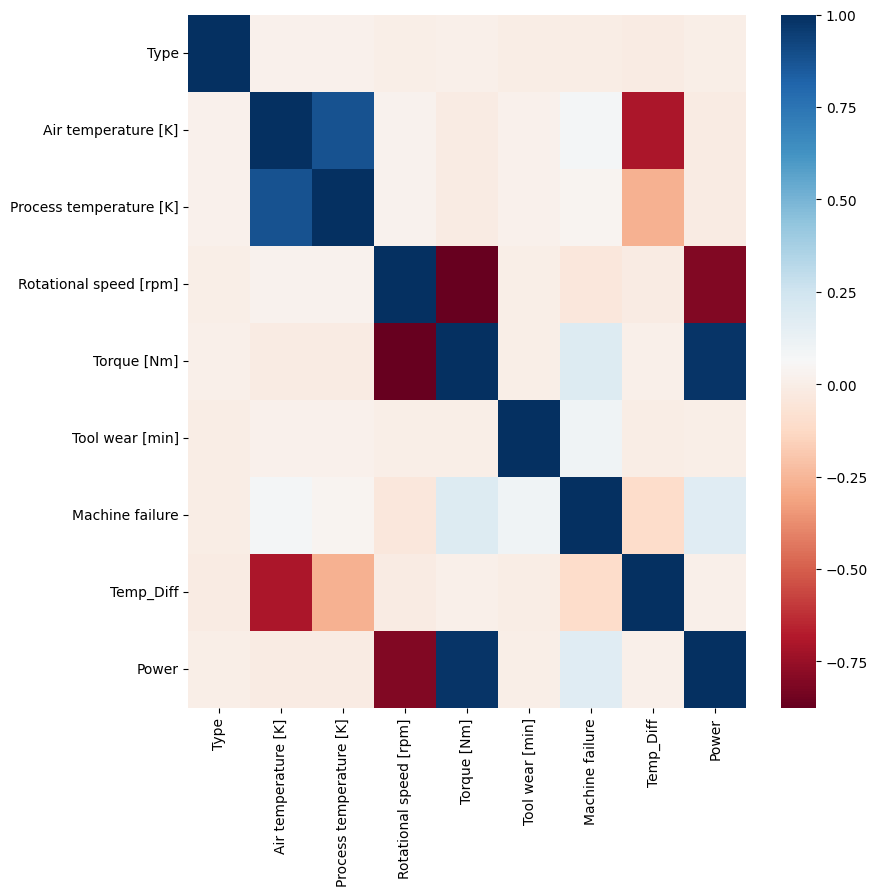

In [ ]:
import seaborn as sns # create the correlation Graph.

plt.figure(figsize=(9, 9))
corr = main_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
# OHE
#main_df = pd.get_dummies(main_df, columns=['Type'], prefix=['Type'])

In [ ]:
import seaborn as sns # data is left biased. nomrally transform this into gaussan model.
# this tells me that most of the card transctins are less than 1000
plt.figure(figsize=(10, 6))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(main_df['Rotational speed [rpm]'])

In [ ]:
'''
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # only pull out fraud case, and calculate percentile of Q1, and Q3 spot
    fraud = main_df[main_df['Machine failure']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # multiplying 1.5 to calculated IQR, and add or subtract to Q3, and Q1
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # Defining Outlier Values
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    '''

"\nimport numpy as np\n\ndef get_outlier(df=None, column=None, weight=1.5):\n    # only pull out fraud case, and calculate percentile of Q1, and Q3 spot\n    fraud = main_df[main_df['Machine failure']==1][column]\n    quantile_25 = np.percentile(fraud.values, 25)\n    quantile_75 = np.percentile(fraud.values, 75)\n    # multiplying 1.5 to calculated IQR, and add or subtract to Q3, and Q1\n    iqr = quantile_75 - quantile_25\n    iqr_weight = iqr * weight\n    lowest_val = quantile_25 - iqr_weight\n    highest_val = quantile_75 + iqr_weight\n    # Defining Outlier Values\n    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index\n    return outlier_index\n    "

In [ ]:
#outlier_index = get_outlier(df=df, column='Rotational speed [rpm]', weight=1) # get the outlier for Contract since it has very low corr
#print('Outliers:', outlier_index)

In [ ]:
#main_df.drop(outlier_index, axis=0, inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE # only use SMOTE on training data and not testing.

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before SMOTE: ', X_train.shape, y_train.shape)
print('After SMOTE: ', X_train_over.shape, y_train_over.shape)
print('Label Variance After SMOTE: \n', pd.Series(y_train_over).value_counts())

Before SMOTE:  (7500, 8) (7500,)
After SMOTE:  (14466, 8) (14466,)
Label Variance After SMOTE: 
 Machine failure
0    7233
1    7233
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter = 200) # logistic regression only accepts non-numerical values
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
get_clf_metrics(y_test, pred_y)

Confusion Matrix:
[[1568  221]
 [ 260 1568]]
Accuracy: 0.8670168648050871
Precision: 0.8764673001676915
Recall: 0.8577680525164114
F1 Score: 0.8670168648050871


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
threshold = 0.3  # Experiment with different values
pred_y = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
get_clf_metrics(y_test, pred_y)

Confusion Matrix:
[[1361  428]
 [  98 1730]]
Accuracy: 0.8545756151506774
Precision: 0.8016682113067656
Recall: 0.9463894967177243
F1 Score: 0.868038133467135


In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(dt_classifier,
                   X_train_over,
                   y_train_over,
                   target_name='Failure_Reason',
                   feature_names=X_train_over.columns
                  )
    viz.view()
# Make sure to import the necessary libraries for your decision tree model (e.g., sklearn.tree)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train)
pred_y_dt = dt_classifier.predict(X_test)
get_clf_metrics(y_test, pred_y_dt)

Confusion Matrix:
[[1631  158]
 [  89 1739]]
Accuracy: 0.9317113630080177
Precision: 0.9167105956773853
Recall: 0.9513129102844639
F1 Score: 0.9336912751677853


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,  # Number of decision trees in the ensemble
    random_state=42
)
# Fit the bagging classifier to your training data
bagging_classifier.fit(X_train, y_train)
# Make predictions
pred_y_bagging = bagging_classifier.predict(X_test)
# Evaluate performance
get_clf_metrics(y_test, pred_y_bagging)

Confusion Matrix:
[[1727   62]
 [  53 1775]]
Accuracy: 0.9682056953276196
Precision: 0.9662493195427327
Recall: 0.9710065645514223
F1 Score: 0.9686221009549796


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier with DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=4),  # You can adjust max_depth
    n_estimators=50,  # Number of estimators (weak learners)
    random_state=42
)

# Fit the AdaBoost classifier to your training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions
pred_y_adaboost = adaboost_classifier.predict(X_test)

# Evaluate performance
get_clf_metrics(y_test, pred_y_adaboost)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[1759   30]
 [  22 1806]]
Accuracy: 0.9856234448437932
Precision: 0.9836601307189542
Recall: 0.9879649890590809
F1 Score: 0.9858078602620087


In [ ]:
#X_train_over.columns = X_train_over.columns.str.lower().str.replace(']', '')
y_train.columns = y_train.columns.str.lower().str.replace(']', '')
y_train.columns = y_train.columns.str.lower().str.replace('[', '')
X_train.columns = X_train.columns.str.lower().str.replace('[', '')
X_train.columns = X_train.columns.str.lower().str.replace(']', '')
X_test.columns = X_test.columns.str.lower().str.replace('[', '')
X_test.columns = X_test.columns.str.lower().str.replace(']', '')


In [ ]:
# Install XGBoost if not already installed
#!pip install xgboost==1.7.5

# Import the necessary library
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=75,
    learning_rate=0.5,
    max_depth=4,
    random_state=42
)

# Fit the XGBoost classifier to your training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
pred_y_xgb = xgb_classifier.predict(X_test)

# Evaluate performance
get_clf_metrics(y_test, pred_y_xgb)

Confusion Matrix:
[[1754   35]
 [  27 1801]]
Accuracy: 0.9828587226983688
Precision: 0.9809368191721133
Recall: 0.9852297592997812
F1 Score: 0.9830786026200873


In [ ]:
predictions_df = pd.DataFrame(pred_y_xgb, columns=['Machine Failure'])
predictions_df.value_counts()

,count
Machine Failure,
1,1836
0,1781


# ------- Part II ----------

In [ ]:
#file_path = r'/content/drive/MyDrive/Fall 2024/CSML/Final Project/ai4i2020.csv'

# Read the CSV file
#df = pd.read_csv(file_path)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Diff,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,56320.0


In [ ]:
drop_cols_2 = ['UDI','Product ID']
df.drop(drop_cols_2, axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temp_Diff,Power
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,66382.8
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,65190.4
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,74001.2
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,56603.5
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,56320.0


In [ ]:
import pandas as pd

def transform_failure_data(df):
    """
    Transform machine failure data taking only the first failure reason encountered.

    Parameters:
    df (pandas.DataFrame): Original dataframe with failure columns

    Returns:
    pandas.DataFrame: Transformed dataframe with single failure reason
    """
    # Create a copy of the input dataframe
    base_cols = ['Type', 'Air temperature [K]', 'Process temperature [K]',
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure','Temp_Diff', 'Power']

    # Dictionary to map column names to failure reasons
    failure_types = {
        'TWF': 'TWF',
        'HDF': 'HDF',
        'PWF': 'PWF',
        'OSF': 'OSF',
        'RNF': 'RNF'
    }

    # Create list to store transformed rows
    transformed_rows = []

    # Iterate through each row
    for idx, row in df.iterrows():
        new_row = row[base_cols].to_dict()
        #new_row['original_index'] = idx

        if row['Machine failure'] == 0:
            # No failure case
            new_row['Failure_Reason'] = 'No Failure'
        else:
            # Get the first failure reason that has value 1
            failure_found = False
            for col, reason in failure_types.items():
                if row[col] == 1:
                    new_row['Failure_Reason'] = reason
                    failure_found = True
                    break  # Stop after finding the first failure

            if not failure_found:
                # Case where Machine failure is 1 but no specific reason is marked
                new_row['Failure_Reason'] = 'RNF' # changing it to RNF because it is a random reason for failure which we do not know.

        transformed_rows.append(new_row)

    # Create new dataframe from transformed rows
    result_df = pd.DataFrame(transformed_rows)

    # Sort by original index to maintain order
    #result_df = result_df.sort_values('original_index')

    return result_df

# Example usage:
transformed_df = transform_failure_data(df)
transformed_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power,Failure_Reason
0,M,298.1,308.6,1551,42.8,0,0,10.5,66382.8,No Failure
1,L,298.2,308.7,1408,46.3,3,0,10.5,65190.4,No Failure
2,L,298.1,308.5,1498,49.4,5,0,10.4,74001.2,No Failure
3,L,298.2,308.6,1433,39.5,7,0,10.4,56603.5,No Failure
4,L,298.2,308.7,1408,40.0,9,0,10.5,56320.0,No Failure


In [ ]:
fail = transformed_df[transformed_df['Machine failure']==1]
fail.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_Diff,Power,Failure_Reason
50,L,298.9,309.1,2861,4.6,143,1,10.2,13160.6,PWF
69,L,298.9,309.0,1410,65.7,191,1,10.1,92637.0,PWF
77,L,298.8,308.9,1455,41.3,208,1,10.1,60091.5,TWF
160,L,298.4,308.2,1282,60.7,216,1,9.8,77817.4,OSF
161,L,298.3,308.1,1412,52.3,218,1,9.8,73847.6,OSF


In [ ]:
fail['Type'].value_counts()

,count
Type,
L,235
M,83
H,21


In [ ]:
categorical_cols = ['Type', 'Failure_Reason']

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    fail[col] = encoder.fit_transform(fail[col])

#fail['Type'].value_counts()

<ipython-input-22-b306ec4551e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail[col] = encoder.fit_transform(fail[col])
<ipython-input-22-b306ec4551e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail[col] = encoder.fit_transform(fail[col])


In [ ]:
fail.columns = fail.columns.str.lower().str.replace(']', '')
fail.columns = fail.columns.str.lower().str.replace('[', '')

In [ ]:
fail.head()

,type,air temperature k,process temperature k,rotational speed rpm,torque nm,tool wear min,machine failure,temp_diff,power,failure_reason
50,1,298.9,309.1,2861,4.6,143,1,10.2,13160.6,2
69,1,298.9,309.0,1410,65.7,191,1,10.1,92637.0,2
77,1,298.8,308.9,1455,41.3,208,1,10.1,60091.5,4
160,1,298.4,308.2,1282,60.7,216,1,9.8,77817.4,1
161,1,298.3,308.1,1412,52.3,218,1,9.8,73847.6,1


In [ ]:
X_features = fail.drop('failure_reason', axis=1) # features
y_labels = fail['failure_reason'] # labels
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.25, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE # only use SMOTE on training data and not testing.

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('Before SMOTE: ', X_train.shape, y_train.shape)
print('After SMOTE: ', X_train_over.shape, y_train_over.shape)
print('Label Variance After SMOTE: \n', pd.Series(y_train_over).value_counts())

Before SMOTE:  (254, 9) (254,)
After SMOTE:  (440, 9) (440,)
Label Variance After SMOTE: 
 failure_reason
2    88
1    88
0    88
4    88
3    88
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def get_clf_metrics_multiclass(y_test, pred_y, average='weighted'):
    confusion = confusion_matrix(y_test, pred_y)
    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average=average)  # Specify average
    recall = recall_score(y_test, pred_y, average=average)  # Specify average
    f1 = f1_score(y_test, pred_y, average=average)  # Specify average
    print(f"Confusion Matrix:\n{confusion}\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
#!pip install xgboost==1.7.5
# Import the necessary library
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For binary classification
    n_estimators=100,
    learning_rate=0.5,
    max_depth=7,
    random_state=42
)

# Fit the XGBoost classifier to your training data
xgb_classifier.fit(X_train_over, y_train_over)

# Make predictions
pred_y_xgb = xgb_classifier.predict(X_test)

# Evaluate performance
get_clf_metrics_multiclass(y_test, pred_y_xgb)

Confusion Matrix:
[[27  0  0  0  0]
 [ 1 19  0  0  1]
 [ 0  0 17  0  0]
 [ 0  0  0  3  0]
 [ 0  1  1  0 15]]

Accuracy: 0.9529
Precision: 0.9527
Recall: 0.9529
F1 Score: 0.9523


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(
    max_depth=4,
    criterion='gini',
    min_samples_split=9,
    min_samples_leaf=5,
    random_state=42
)
dt_classifier.fit(X_train_over, y_train_over)
pred_y_dt = dt_classifier.predict(X_test)
get_clf_metrics_multiclass(y_test, pred_y_dt)

Confusion Matrix:
[[27  0  0  0  0]
 [ 1 19  1  0  0]
 [ 0  1 16  0  0]
 [ 0  0  1  2  0]
 [ 0  1  1  2 13]]

Accuracy: 0.9059
Precision: 0.9159
Recall: 0.9059
F1 Score: 0.9067


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier with DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=7,criterion='gini',
    random_state=42
),  # You can adjust max_depth
    n_estimators=100,  # Number of estimators (weak learners)
    random_state=42
)

# Fit the AdaBoost classifier to your training data
adaboost_classifier.fit(X_train_over, y_train_over)

# Make predictions
pred_y_adaboost = adaboost_classifier.predict(X_test)

# Evaluate performance
get_clf_metrics_multiclass(y_test, pred_y_adaboost)

Confusion Matrix:
[[27  0  0  0  0]
 [ 1 18  0  0  2]
 [ 0  1 16  0  0]
 [ 0  0  0  3  0]
 [ 0  3  0  1 13]]

Accuracy: 0.9059
Precision: 0.9082
Recall: 0.9059
F1 Score: 0.9054


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=7,criterion='gini',
    random_state=42
),  # You can adjust max_depth
    n_estimators=50,  # Number of estimators (weak learners)
    random_state=42
)
# Fit the bagging classifier to your training data
bagging_classifier.fit(X_train_over, y_train_over)
# Make predictions
pred_y_bagging = bagging_classifier.predict(X_test)
# Evaluate performance
get_clf_metrics_multiclass(y_test, pred_y_bagging)

Confusion Matrix:
[[27  0  0  0  0]
 [ 1 18  0  1  1]
 [ 0  1 16  0  0]
 [ 0  0  1  2  0]
 [ 0  1  0  0 16]]

Accuracy: 0.9294
Precision: 0.9287
Recall: 0.9294
F1 Score: 0.9288


Training modified decision tree...

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.95      0.90      0.93        21
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00         3
           4       0.94      0.88      0.91        17

    accuracy                           0.95        85
   macro avg       0.96      0.96      0.96        85
weighted avg       0.95      0.95      0.95        85


Cross-validation Results:
Individual fold scores: [0.97727273 1.         0.90909091 0.94318182 0.94318182]
Mean CV Score: 0.955 (+/- 0.063)

Feature Importance Analysis:


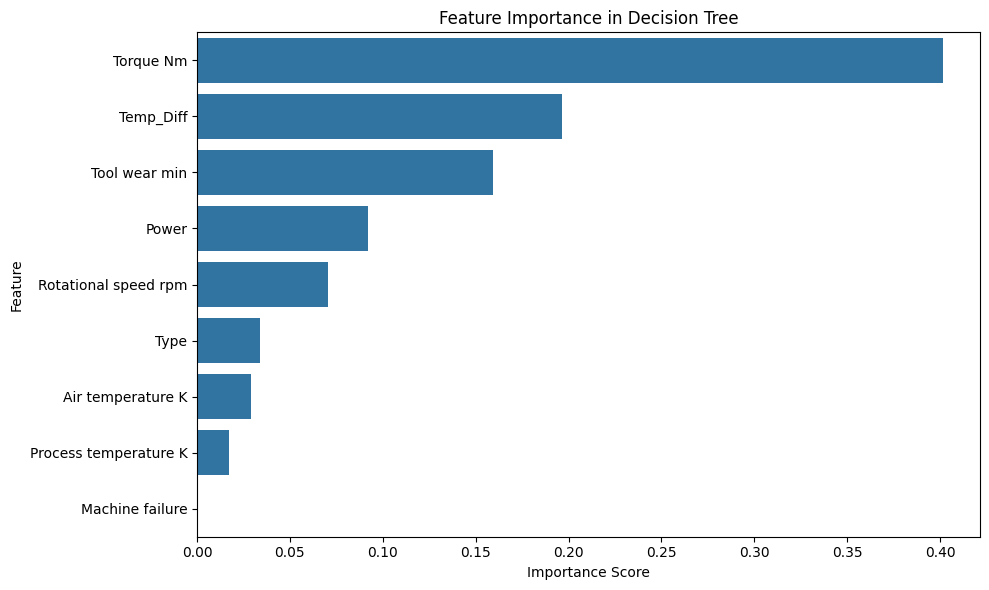


Feature Importance Scores:
                 Feature  Importance
4              Torque Nm    0.401388
7              Temp_Diff    0.196556
5          Tool wear min    0.159127
8                  Power    0.092052
3   Rotational speed rpm    0.070532
0                   Type    0.034079
1      Air temperature K    0.028837
2  Process temperature K    0.017429
6        Machine failure    0.000000


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Modified Decision Tree with suggested parameters
dt_modified = xgb.XGBClassifier(
    objective='multi:softmax',  # For binary classification
    n_estimators=75,
    learning_rate=0.5,
    max_depth=7,
    random_state=42
)

# 2. Cross-validation with stratified k-fold
def perform_cross_validation(model, X, y, n_splits=5):
    """
    Perform stratified cross-validation and return detailed metrics
    """
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Get cross validation scores for accuracy
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    print("\nCross-validation Results:")
    print(f"Individual fold scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return cv_scores

# 3. Feature Importance Analysis
def plot_feature_importance(model, X, feature_names):
    """
    Plot feature importance scores
    """
    # Get feature importance
    importance = model.feature_importances_

    # Create DataFrame of features and their importance scores
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Feature Importance in Decision Tree')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    return feature_imp

# Main execution
def analyze_decision_tree(X_train_over, y_train_over, X_test, y_test, feature_names):
    """
    Complete analysis of decision tree model
    """
    # 1. Train model with modified parameters
    print("Training modified decision tree...")
    dt_modified.fit(X_train_over, y_train_over)

    # 2. Get predictions
    y_pred = dt_modified.predict(X_test)

    # 3. Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 4. Perform cross-validation
    cv_scores = perform_cross_validation(dt_modified, X_train_over, y_train_over)

    # 5. Plot and print feature importance
    print("\nFeature Importance Analysis:")
    feature_imp = plot_feature_importance(dt_modified, X_train_over, feature_names)
    print("\nFeature Importance Scores:")
    print(feature_imp)

    return dt_modified, cv_scores, feature_imp

# Usage example:
# Assuming your feature names are stored in a list called 'feature_names'
feature_names = ['Type','Air temperature K', 'Process temperature K',
                 'Rotational speed rpm', 'Torque Nm', 'Tool wear min',
                 'Machine failure','Temp_Diff', 'Power']

# Run the analysis
model, cv_scores, feature_imp = analyze_decision_tree(
     X_train_over, y_train_over, X_test, y_test, feature_names)

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Modified Decision Tree with suggested parameters
dt_modified = xgb.XGBClassifier(
    objective='multi:softmax',  # For binary classification
    n_estimators=75,
    learning_rate=0.5,
    max_depth=7,
    random_state=42
)

# 2. Cross-validation with stratified k-fold
def perform_cross_validation(model, X, y, n_splits=5):
    """
    Perform stratified cross-validation and return detailed metrics
    """
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Get cross validation scores for accuracy
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    print("\nCross-validation Results:")
    print(f"Individual fold scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return cv_scores

# 3. Feature Importance Analysis
def plot_feature_importance(model, X, feature_names):
    """
    Plot feature importance scores
    """
    # Get feature importance
    importance = model.feature_importances_

    # Create DataFrame of features and their importance scores
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Feature Importance in Decision Tree')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    return feature_imp

# Main execution
def analyze_decision_tree(X_train_over, y_train_over, X_test, y_test, feature_names):
    """
    Complete analysis of decision tree model
    """
    # 1. Train model with modified parameters
    print("Training modified decision tree...")
    dt_modified.fit(X_train_over, y_train_over)

    # 2. Get predictions
    y_pred = dt_modified.predict(X_test)

    # 3. Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 4. Perform cross-validation
    cv_scores = perform_cross_validation(dt_modified, X_train_over, y_train_over)

    # 5. Plot and print feature importance
    print("\nFeature Importance Analysis:")
    feature_imp = plot_feature_importance(dt_modified, X_train_over, feature_names)
    print("\nFeature Importance Scores:")
    print(feature_imp)

    return dt_modified, cv_scores, feature_imp

# Usage example:
# Assuming your feature names are stored in a list called 'feature_names'
feature_names = ['Type','Air temperature K', 'Process temperature K',
                 'Rotational speed rpm', 'Torque Nm', 'Tool wear min',
                 'Machine failure','Temp_Diff', 'Power']

# Run the analysis
model, cv_scores, feature_imp = analyze_decision_tree(
     X_train, y_train, X_test, y_test, feature_names)